In [1]:
from openquant.screening import UnivLimit, Universe, Screen
from openquant.dates import Calendar, RelativeDate, Frequency, get_dates
from openquant.utils import qcuts, lineplot
import openquant.applications as apps
import openquant.file_manager as fm
    
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import stats
import seaborn as sns
import missingno as msno
import pandas as pd; pd.options.display.float_format = "{:.2f}".format

In [11]:
## Firstly, we need to specify the time range of the universe you want to build
dates = get_dates(start = RelativeDate.PREV_CLOSE, 
                  stop = RelativeDate.PREV_CLOSE, 
                  freq = Frequency.DAILY)

## Then we can call Universe from screening module and specify S&P500 with UniVLimit.SP50
qfl_univ = Universe(univ_expr = 'FG_CONSTITUENTS(890100, 0, Close)', 
                dates = dates)
qfl_univ

..

Type: EQUITY
Expression: FG_CONSTITUENTS(890100, 0, Close)
# Dates: 1, # Symbols: 1587, Execution Time: 0.34 seconds

In [12]:
qfl_univ.constituents.head()

,company_name,ticker,2020-12-17 00:00:00
symbol,,,
00105510,Aflac Incorporated,AFL-US,True
82434810,Sherwin-Williams Company,SHW-US,True
81685110,Sempra Energy,SRE-US,True
81211K10,Sealed Air Corporation,SEE-US,True
81181C10,"Seagen, Inc.",SGEN-US,True


In [10]:
## Define the names of factors that you are interested and enter their corresponding screening formulas
qfl_factors = {
    'QFL_CFROIC(0,CT)': 'QFL_CFROIC(0,CT)',
    'QFL_CFROIC(0,FY0)': 'QFL_CFROIC(0,FY0)',
    'QFL_CFROIC(0,FY1)': 'QFL_CFROIC(0,FY1)',
    'QFL_CFROIC(0,FY2)': 'QFL_CFROIC(0,FY2)',
    'QFL_CFROIC(0,FY3)': 'QFL_CFROIC(0,FY3)',
    'QFL_CFROIC(0,FY4)': 'QFL_CFROIC(0,FY4)',
    'QFL_CFROIC(0,FY5)': 'QFL_CFROIC(0,FY5)'
}

In [13]:
## Create a Screen object with SP500 as investment universe
qfl_screen = Screen(universe = qfl_univ,
                formulas = list(qfl_factors.values()),
                columns = list(qfl_factors.keys()),
                   )

#                 targets = ['price', 'ret', 'bench_ret'],
#                 target_shifts = [1,2,3])

#store screen data into a dataframe
qfl_df = qfl_screen.data
qfl_screen

..

UNIVERSE:
	Type:		EQUITY
	Expression:	FG_CONSTITUENTS(890100, 0, Close)
	# Dates:	1
	# Symbols:	1587
DATA:
	Shape:		(1587, 10)
	# Data Points:	15,870
	Wall Time:	3.1 seconds

In [14]:
qfl_screen.formulas

['QFL_CFROIC(0,CT)',
 'QFL_CFROIC(0,FY0)',
 'QFL_CFROIC(0,FY1)',
 'QFL_CFROIC(0,FY2)',
 'QFL_CFROIC(0,FY3)',
 'QFL_CFROIC(0,FY4)',
 'QFL_CFROIC(0,FY5)']

In [18]:
qfl_df.head()

ison_screen           company_name   ticker  \
date       symbol                                                  
2020-12-17 00105510         True     Aflac Incorporated   AFL-US   
           00123Q10         True  AGNC Investment Corp.  AGNC-US   
           00130H10         True        AES Corporation   AES-US   
           00206R10         True              AT&T Inc.     T-US   
           00282410         True    Abbott Laboratories   ABT-US   

                     QFL_CFROIC(0,CT)  QFL_CFROIC(0,FY0)  QFL_CFROIC(0,FY1)  \
date       symbol                                                             
2020-12-17 00105510             15.94                nan                nan   
           00123Q10             13.82                nan                nan   
           00130H10             12.40              11.12              10.21   
           00206R10             12.75              12.22              12.10   
           00282410             13.35              12.56              11.58   

                     QFL_CFROIC(0,FY2)  QFL_CFROIC(0,FY3)  QFL_CFROIC(0,FY4)  \
date       symbol                                                              
2020-12-17 00105510                nan                nan                nan   
           00123Q10                nan                nan                nan   
           00130H10              11.02              11.16              10.98   
           00206R10              12.94              13.16              12.49   
           00282410              19.14              18.47              21.50   

                     QFL_CFROIC(0,FY5)  
date       symbol                       
2020-12-17 00105510                nan  
           00123Q10                nan  
           00130H10                nan  
           00206R10              13.90  
           00282410              24.09

In [19]:
qfl_df.describe()

,"QFL_CFROIC(0,CT)","QFL_CFROIC(0,FY0)","QFL_CFROIC(0,FY1)","QFL_CFROIC(0,FY2)","QFL_CFROIC(0,FY3)","QFL_CFROIC(0,FY4)","QFL_CFROIC(0,FY5)"
count,1584.00,1243.00,1281.00,1260.00,1244.00,813.00,440.00
mean,15.41,16.00,15.81,17.23,18.66,18.93,18.51
std,15.59,14.30,16.44,13.95,16.26,15.30,11.86
min,-122.13,-50.36,-132.22,-27.59,-20.54,-11.54,-1.34
25%,7.98,8.72,8.94,9.90,10.92,11.62,11.70
50%,13.29,13.26,13.76,14.40,15.52,15.75,15.80
75%,20.27,20.38,20.49,21.18,21.91,21.97,22.12
max,199.37,199.97,225.21,189.45,303.60,269.97,123.01


In [21]:
# Check NAs

qfl_df.isna().sum()

ison_screen             0
company_name            0
ticker                  0
QFL_CFROIC(0,CT)        3
QFL_CFROIC(0,FY0)     344
QFL_CFROIC(0,FY1)     306
QFL_CFROIC(0,FY2)     327
QFL_CFROIC(0,FY3)     343
QFL_CFROIC(0,FY4)     774
QFL_CFROIC(0,FY5)    1147
dtype: int64

In [28]:
# Check Not-NAs

qfl_df.notna().sum()

ison_screen          1587
company_name         1587
ticker               1587
QFL_CFROIC(0,CT)     1584
QFL_CFROIC(0,FY0)    1243
QFL_CFROIC(0,FY1)    1281
QFL_CFROIC(0,FY2)    1260
QFL_CFROIC(0,FY3)    1244
QFL_CFROIC(0,FY4)     813
QFL_CFROIC(0,FY5)     440
dtype: int64

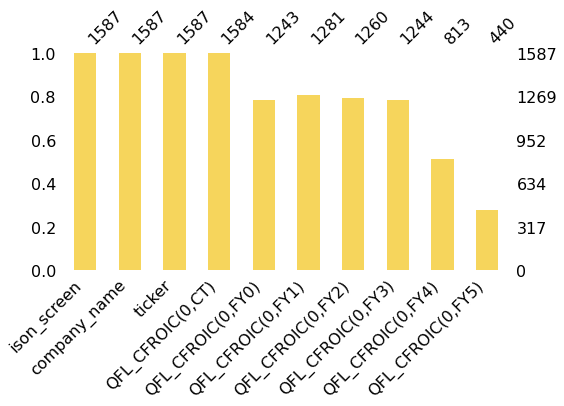

In [23]:
## Plot the data coverage for each factor
msno.bar(qfl_df[[c for c in qfl_df.columns]], 
         color='#F6D55C', 
         figsize=(8,4))
plt.show()

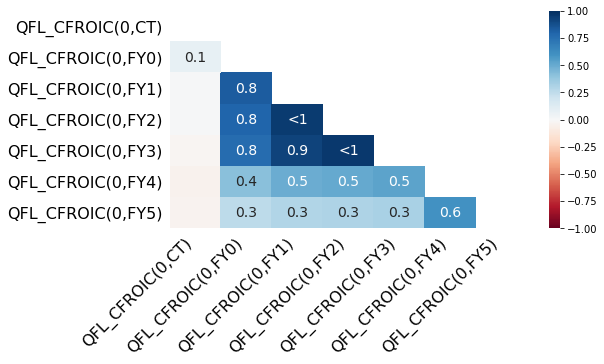

In [29]:
## Plot the correlation of nullity between each pair of factors
msno.heatmap(qfl_df[[c for c in qfl_df.columns]], 
             figsize=(8,4))
plt.show()

In [30]:
advanced_describe = {}
stats_table = pd.DataFrame()
for factor in qfl_df.columns[3:]:
    advanced_describe[factor] = stats.describe(qfl_df[factor].dropna(), axis=0)    
    adv_stats = {keys: [np.round(series, 2) for series in values] for (keys, values) in zip(advanced_describe.keys(), advanced_describe.values())}
    stats_table = pd.DataFrame(adv_stats, index=['nobs', 'minmax', 'mean', 'variance', 'skewness', 'kurtosis']).T
stats_table

,nobs,minmax,mean,variance,skewness,kurtosis
"QFL_CFROIC(0,CT)",1584,"[-122.13, 199.37]",15.41,243.12,1.71,22.65
"QFL_CFROIC(0,FY0)",1243,"[-50.36, 199.97]",16.00,204.53,3.63,33.01
"QFL_CFROIC(0,FY1)",1281,"[-132.22, 225.21]",15.81,270.39,2.45,34.41
"QFL_CFROIC(0,FY2)",1260,"[-27.59, 189.45]",17.23,194.69,4.35,40.57
"QFL_CFROIC(0,FY3)",1244,"[-20.54, 303.6]",18.66,264.38,7.15,95.49
"QFL_CFROIC(0,FY4)",813,"[-11.54, 269.97]",18.93,234.17,7.35,97.57
"QFL_CFROIC(0,FY5)",440,"[-1.34, 123.01]",18.51,140.62,3.22,19.23


In [43]:
## Plot the data with "extremely large" QFL_CFROIC(0,CT) ratios

qfl_df.sort_values(by='QFL_CFROIC(0,CT)', ascending=False).head()

ison_screen               company_name   ticker  \
date       symbol                                                      
2020-12-17 92343E10         True             VeriSign, Inc.  VRSN-US   
           34959E10         True             Fortinet, Inc.  FTNT-US   
           B06CMQ           True  GMO Payment Gateway, Inc.  3769-JP   
           40434L10         True                    HP Inc.   HPQ-US   
           718762           True           Lundin Energy AB  LUNE-SE   

                     QFL_CFROIC(0,CT)  QFL_CFROIC(0,FY0)  QFL_CFROIC(0,FY1)  \
date       symbol                                                             
2020-12-17 92343E10            199.37             199.97             225.21   
           34959E10            109.57              54.79              88.56   
           B06CMQ              107.90               4.70              35.42   
           40434L10            107.79             134.86             150.12   
           718762              103.10              66.50              77.40   

                     QFL_CFROIC(0,FY2)  QFL_CFROIC(0,FY3)  QFL_CFROIC(0,FY4)  \
date       symbol                                                              
2020-12-17 92343E10             188.70             170.79                nan   
           34959E10              87.68              65.52                nan   
           B06CMQ                41.88              48.58              48.52   
           40434L10             189.45             196.36                nan   
           718762               105.66             104.83              48.65   

                     QFL_CFROIC(0,FY5)  
date       symbol                       
2020-12-17 92343E10                nan  
           34959E10                nan  
           B06CMQ                  nan  
           40434L10                nan  
           718762                37.94

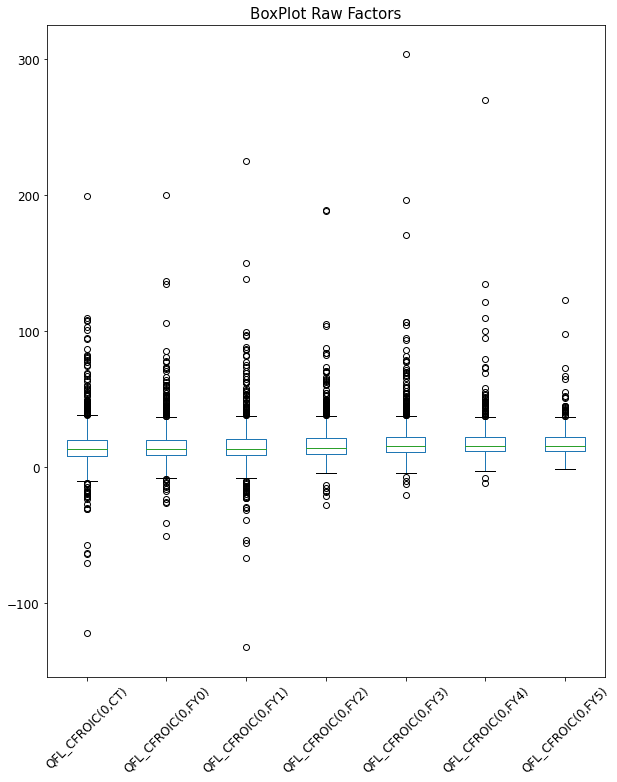

In [152]:
qfl_df[qfl_df.columns[3:]].boxplot(grid=False, rot=45, fontsize=12, figsize = (10,12)).set_title('BoxPlot Raw Factors', fontsize = 15);

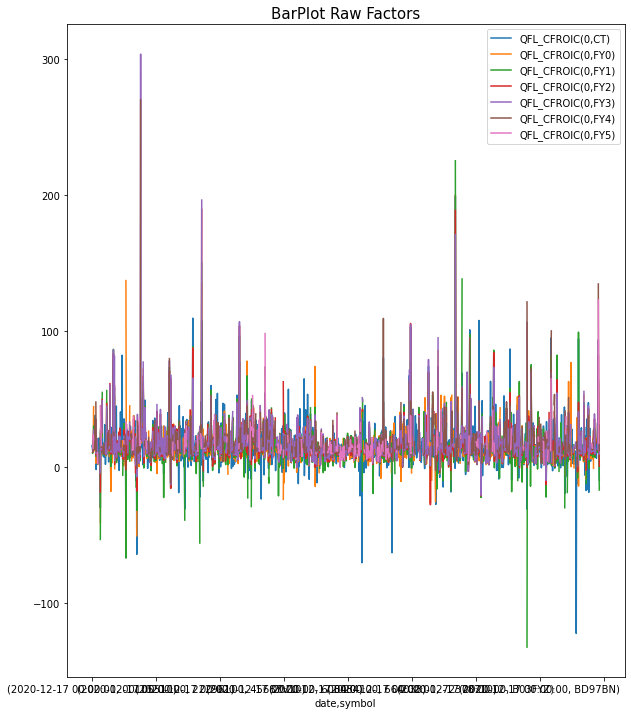

In [150]:
qfl_df[qfl_df.columns[3:]].plot(figsize = (10,12), label = qfl_df.columns[3:]).set_title('BarPlot Raw Factors', fontsize = 15);

In [79]:
# Z-Score

qfl_df_z = pd.DataFrame()

for factor in qfl_df[qfl_df.columns[3:]]:
    z_score = ( qfl_df[factor] - qfl_df[factor].mean() ) / qfl_df[factor].std()
    qfl_df_z[factor] = z_score

qfl_df_z.describe()

,"QFL_CFROIC(0,CT)","QFL_CFROIC(0,FY0)","QFL_CFROIC(0,FY1)","QFL_CFROIC(0,FY2)","QFL_CFROIC(0,FY3)","QFL_CFROIC(0,FY4)","QFL_CFROIC(0,FY5)"
count,1584.00,1243.00,1281.00,1260.00,1244.00,813.00,440.00
mean,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-8.82,-4.64,-9.00,-3.21,-2.41,-1.99,-1.67
25%,-0.48,-0.51,-0.42,-0.53,-0.48,-0.48,-0.57
50%,-0.14,-0.19,-0.12,-0.20,-0.19,-0.21,-0.23
75%,0.31,0.31,0.28,0.28,0.20,0.20,0.30
max,11.80,12.86,12.73,12.34,17.52,16.40,8.81


In [95]:
# qfl_df_z = qfl_df_z.drop(columns = ['mfr'])

# MFR Z-Score

qfl_df_z['MFR'] = qfl_df_z.mean(axis = 1)

qfl_df_z.head()

QFL_CFROIC(0,CT)  QFL_CFROIC(0,FY0)  QFL_CFROIC(0,FY1)  \
date       symbol                                                             
2020-12-17 00105510              0.03                nan                nan   
           00123Q10             -0.10                nan                nan   
           00130H10             -0.19              -0.34              -0.34   
           00206R10             -0.17              -0.26              -0.23   
           00282410             -0.13              -0.24              -0.26   

                     QFL_CFROIC(0,FY2)  QFL_CFROIC(0,FY3)  QFL_CFROIC(0,FY4)  \
date       symbol                                                              
2020-12-17 00105510                nan                nan                nan   
           00123Q10                nan                nan                nan   
           00130H10              -0.44              -0.46              -0.52   
           00206R10              -0.31              -0.34              -0.42   
           00282410               0.14              -0.01               0.17   

                     QFL_CFROIC(0,FY5)   MFR  
date       symbol                             
2020-12-17 00105510                nan  0.03  
           00123Q10                nan -0.10  
           00130H10                nan -0.39  
           00206R10              -0.39 -0.31  
           00282410               0.47  0.02

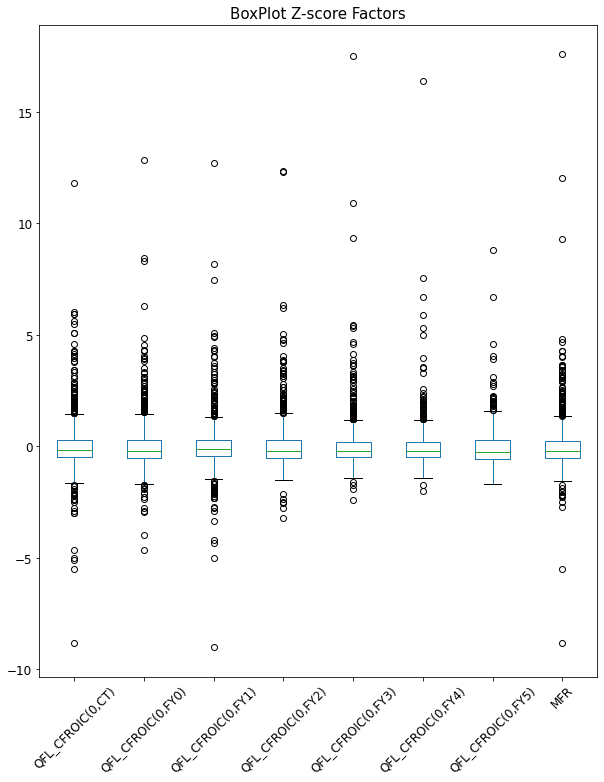

In [153]:
qfl_df_z[qfl_df_z.columns].boxplot(grid=False, rot=45, fontsize=12, figsize = (10,12)).set_title('BoxPlot Z-score Factors', fontsize = 15);

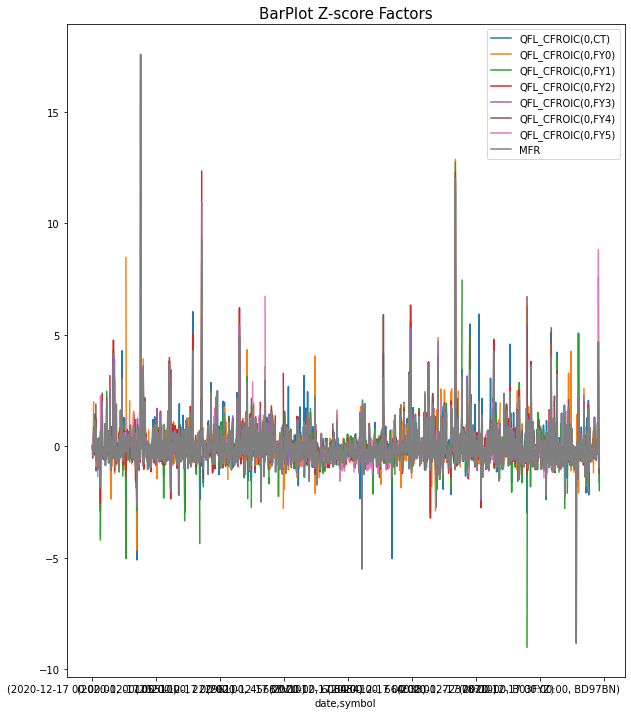

In [154]:
qfl_df_z[qfl_df_z.columns].plot(figsize = (10,12), label = qfl_df_z.columns).set_title('BarPlot Z-score Factors', fontsize = 15);

In [155]:
# Min-Max standardization

qfl_df_minmax = pd.DataFrame()

for factor in qfl_df[qfl_df.columns[3:]]:
    minmax = ( qfl_df[factor] - qfl_df[factor].min() ) / ( qfl_df[factor].max() - qfl_df[factor].min() )
    qfl_df_minmax[factor] = minmax

qfl_df_minmax.describe()

,"QFL_CFROIC(0,CT)","QFL_CFROIC(0,FY0)","QFL_CFROIC(0,FY1)","QFL_CFROIC(0,FY2)","QFL_CFROIC(0,FY3)","QFL_CFROIC(0,FY4)","QFL_CFROIC(0,FY5)"
count,1584.00,1243.00,1281.00,1260.00,1244.00,813.00,440.00
mean,0.43,0.27,0.41,0.21,0.12,0.11,0.16
std,0.05,0.06,0.05,0.06,0.05,0.05,0.10
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.40,0.24,0.39,0.17,0.10,0.08,0.10
50%,0.42,0.25,0.41,0.19,0.11,0.10,0.14
75%,0.44,0.28,0.43,0.22,0.13,0.12,0.19
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [156]:
# MFR Min-Max

qfl_df_minmax['MFR'] = qfl_df_minmax.mean(axis = 1)

qfl_df_minmax.head()

QFL_CFROIC(0,CT)  QFL_CFROIC(0,FY0)  QFL_CFROIC(0,FY1)  \
date       symbol                                                             
2020-12-17 00105510              0.43                nan                nan   
           00123Q10              0.42                nan                nan   
           00130H10              0.42               0.25               0.40   
           00206R10              0.42               0.25               0.40   
           00282410              0.42               0.25               0.40   

                     QFL_CFROIC(0,FY2)  QFL_CFROIC(0,FY3)  QFL_CFROIC(0,FY4)  \
date       symbol                                                              
2020-12-17 00105510                nan                nan                nan   
           00123Q10                nan                nan                nan   
           00130H10               0.18               0.10               0.08   
           00206R10               0.19               0.10               0.09   
           00282410               0.22               0.12               0.12   

                     QFL_CFROIC(0,FY5)  MFR  
date       symbol                            
2020-12-17 00105510                nan 0.43  
           00123Q10                nan 0.42  
           00130H10                nan 0.24  
           00206R10               0.12 0.22  
           00282410               0.20 0.25

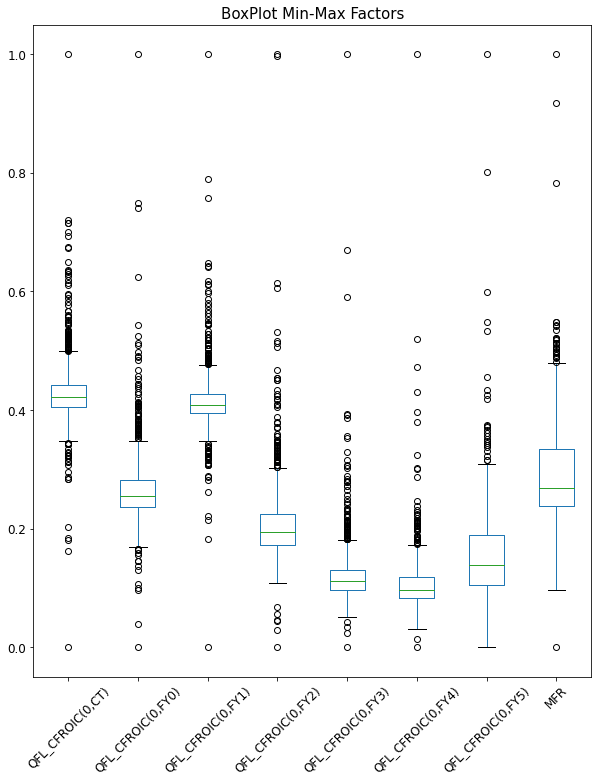

In [159]:
qfl_df_minmax[qfl_df_minmax.columns].boxplot(grid=False, rot=45, fontsize=12, figsize = (10,12)).set_title('BoxPlot Min-Max Factors', fontsize = 15);

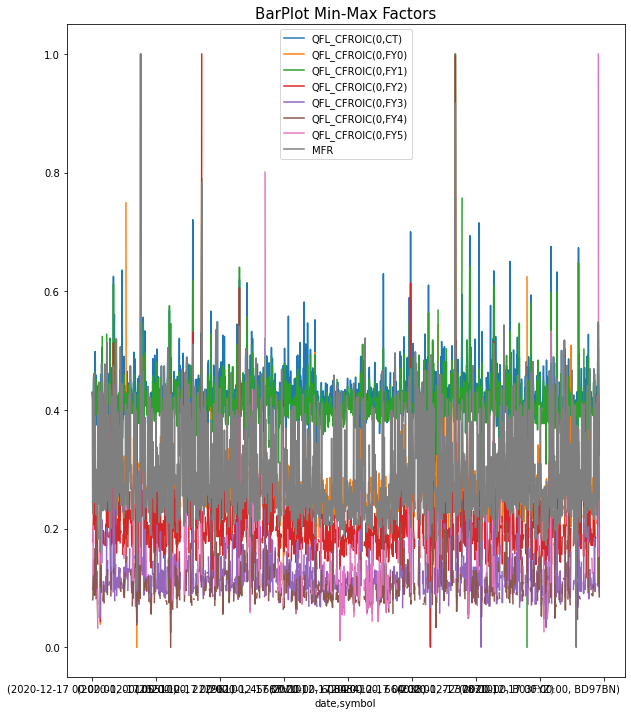

In [158]:
qfl_df_minmax[qfl_df_minmax.columns].plot(figsize = (10,12), label = qfl_df_minmax.columns).set_title('BarPlot Min-Max Factors', fontsize = 15);